# Data Analysis Loan Default Prediction

**==========================================================================================================**

## Project Description

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Data Dictionary

![image](desc.png)

## Data sources used

In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

import datetime
from datetime import datetime, timedelta, date


import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("train.csv", low_memory=False)

In [3]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


**==========================================================================================================**

## Data Quick Glance

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.dtypes.value_counts()

object     8
int64      8
float64    2
dtype: int64

In [7]:
# Descriptive Statistical Analysis
df.describe(include="all")

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347,255347,255347,255347,255347,255347,255347,255347.00
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12
std,NaN,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32
min,NaN,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00
mean,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,0.12
std,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,0.32
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,0.00
50%,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,0.00
75%,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00


In [9]:
# Descriptive Statistical Analysis
df.describe(include="object")

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [10]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'], dtype='object')

In [11]:
df.shape

(255347, 18)

In [12]:
df.Default.value_counts().to_frame()

,Default
0,225694
1,29653


In [13]:
df.Default.value_counts(normalize=True).to_frame()

,Default
0,0.88
1,0.12


In [14]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [15]:
df.duplicated().sum()

0

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [16]:
df = df.sample(frac=0.25)

In [17]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
91816,NRMNFOD1TI,56,109663,107028,498,9,3,18.48,12,0.45,High School,Self-employed,Married,Yes,Yes,Auto,No,0
140989,QVAK8MJROX,56,129151,233093,610,48,3,10.03,36,0.51,Master's,Unemployed,Married,No,No,Other,No,0
57275,GVAMCK6TF7,34,43087,162002,623,31,2,22.26,60,0.58,Bachelor's,Part-time,Married,Yes,Yes,Education,Yes,0
130235,JLM099YEU9,40,63747,120320,590,14,3,4.73,60,0.13,PhD,Full-time,Married,No,No,Business,Yes,0
244648,KAB93X18M3,48,124406,222023,784,106,3,9.82,24,0.42,High School,Full-time,Single,Yes,Yes,Business,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173269,Z2BEU5QD83,36,122401,77924,662,65,1,2.97,48,0.57,Master's,Self-employed,Single,No,Yes,Education,Yes,0
2091,87LE03678W,26,129049,57199,556,19,4,15.57,24,0.16,Master's,Full-time,Divorced,Yes,No,Education,No,0
128237,0A9G7NFI7Y,58,68927,239786,658,105,1,19.72,12,0.49,Master's,Full-time,Married,Yes,Yes,Auto,Yes,0
143490,5CO28QAQ5G,23,112673,21061,751,86,4,5.15,24,0.10,Master's,Part-time,Married,No,No,Business,Yes,0


In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,NRMNFOD1TI,56,109663,107028,498,9,3,18.48,12,0.45,High School,Self-employed,Married,Yes,Yes,Auto,No,0
1,QVAK8MJROX,56,129151,233093,610,48,3,10.03,36,0.51,Master's,Unemployed,Married,No,No,Other,No,0
2,GVAMCK6TF7,34,43087,162002,623,31,2,22.26,60,0.58,Bachelor's,Part-time,Married,Yes,Yes,Education,Yes,0
3,JLM099YEU9,40,63747,120320,590,14,3,4.73,60,0.13,PhD,Full-time,Married,No,No,Business,Yes,0
4,KAB93X18M3,48,124406,222023,784,106,3,9.82,24,0.42,High School,Full-time,Single,Yes,Yes,Business,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63832,Z2BEU5QD83,36,122401,77924,662,65,1,2.97,48,0.57,Master's,Self-employed,Single,No,Yes,Education,Yes,0
63833,87LE03678W,26,129049,57199,556,19,4,15.57,24,0.16,Master's,Full-time,Divorced,Yes,No,Education,No,0
63834,0A9G7NFI7Y,58,68927,239786,658,105,1,19.72,12,0.49,Master's,Full-time,Married,Yes,Yes,Auto,Yes,0
63835,5CO28QAQ5G,23,112673,21061,751,86,4,5.15,24,0.10,Master's,Part-time,Married,No,No,Business,Yes,0


In [20]:
df.shape

(63837, 18)

In [21]:
df.Default.value_counts()

0    56337
1     7500
Name: Default, dtype: int64

In [22]:
df.Default.value_counts(normalize=True)

0   0.88
1   0.12
Name: Default, dtype: float64

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [23]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'], dtype='object')

In [24]:
dfmm = df.groupby(["Default"], as_index=True)['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                                                  'NumCreditLines', 'InterestRate', 'LoanTerm', 
                                                 'DTIRatio'].agg([np.mean, np.median, np.std]).T
dfmm

Default                       0         1
Age            mean       44.46     36.61
               median     45.00     34.00
               std        14.85     13.79
Income         mean    83844.74  71834.79
               median  84054.00  66321.00
               std     38517.98  40732.74
LoanAmount     mean   125386.71 145384.68
               median 124668.00 153791.50
               std     70723.91  69542.46
CreditScore    mean      575.46    559.77
               median    575.00    552.00
               std       159.49    157.36
MonthsEmployed mean       60.92     49.78
               median     62.00     45.00
               std        34.57     33.96
NumCreditLines mean        2.49      2.61
               median      2.00      3.00
               std         1.12      1.13
InterestRate   mean       13.18     15.90
               median     12.97     16.88
               std         6.61      6.37
LoanTerm       mean       36.01     36.25
               median     36.00     36.00
               std        16.97     16.97
DTIRatio       mean        0.50      0.51
               median      0.50      0.52
               std         0.23      0.23

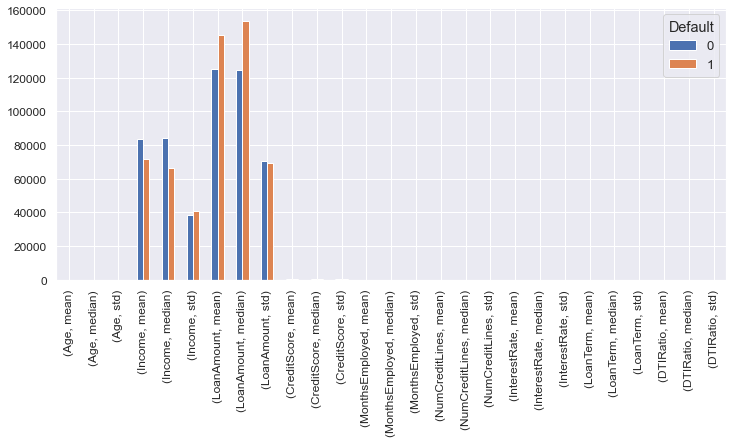

In [25]:
dfmm.plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

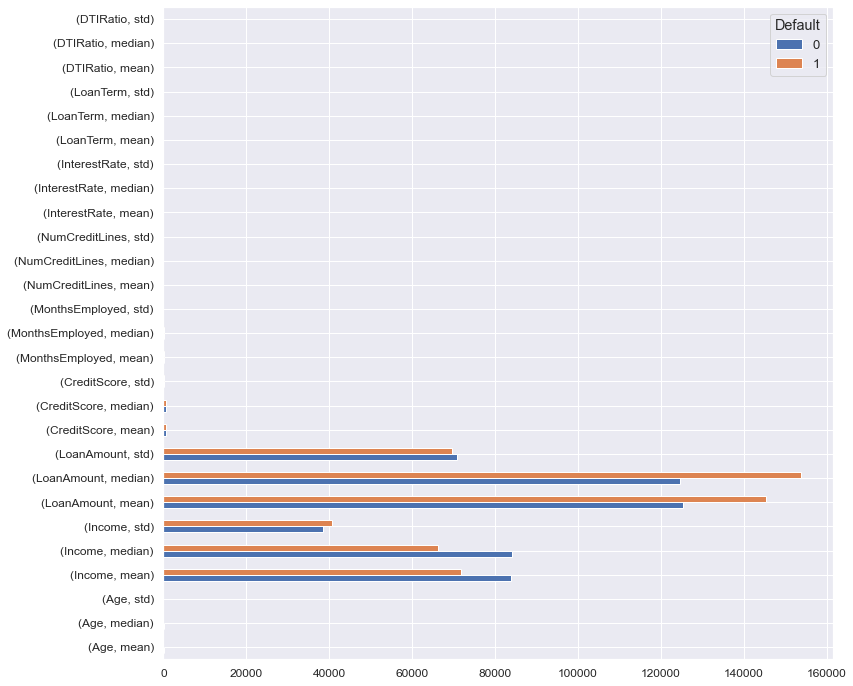

In [26]:
dfmm.plot(kind = "barh", figsize = (12,12), fontsize = 12)
plt.show()

**==========================================================================================================**

# Data Visualization

**==========================================================================================================**

## Histogram

### Pandas Version

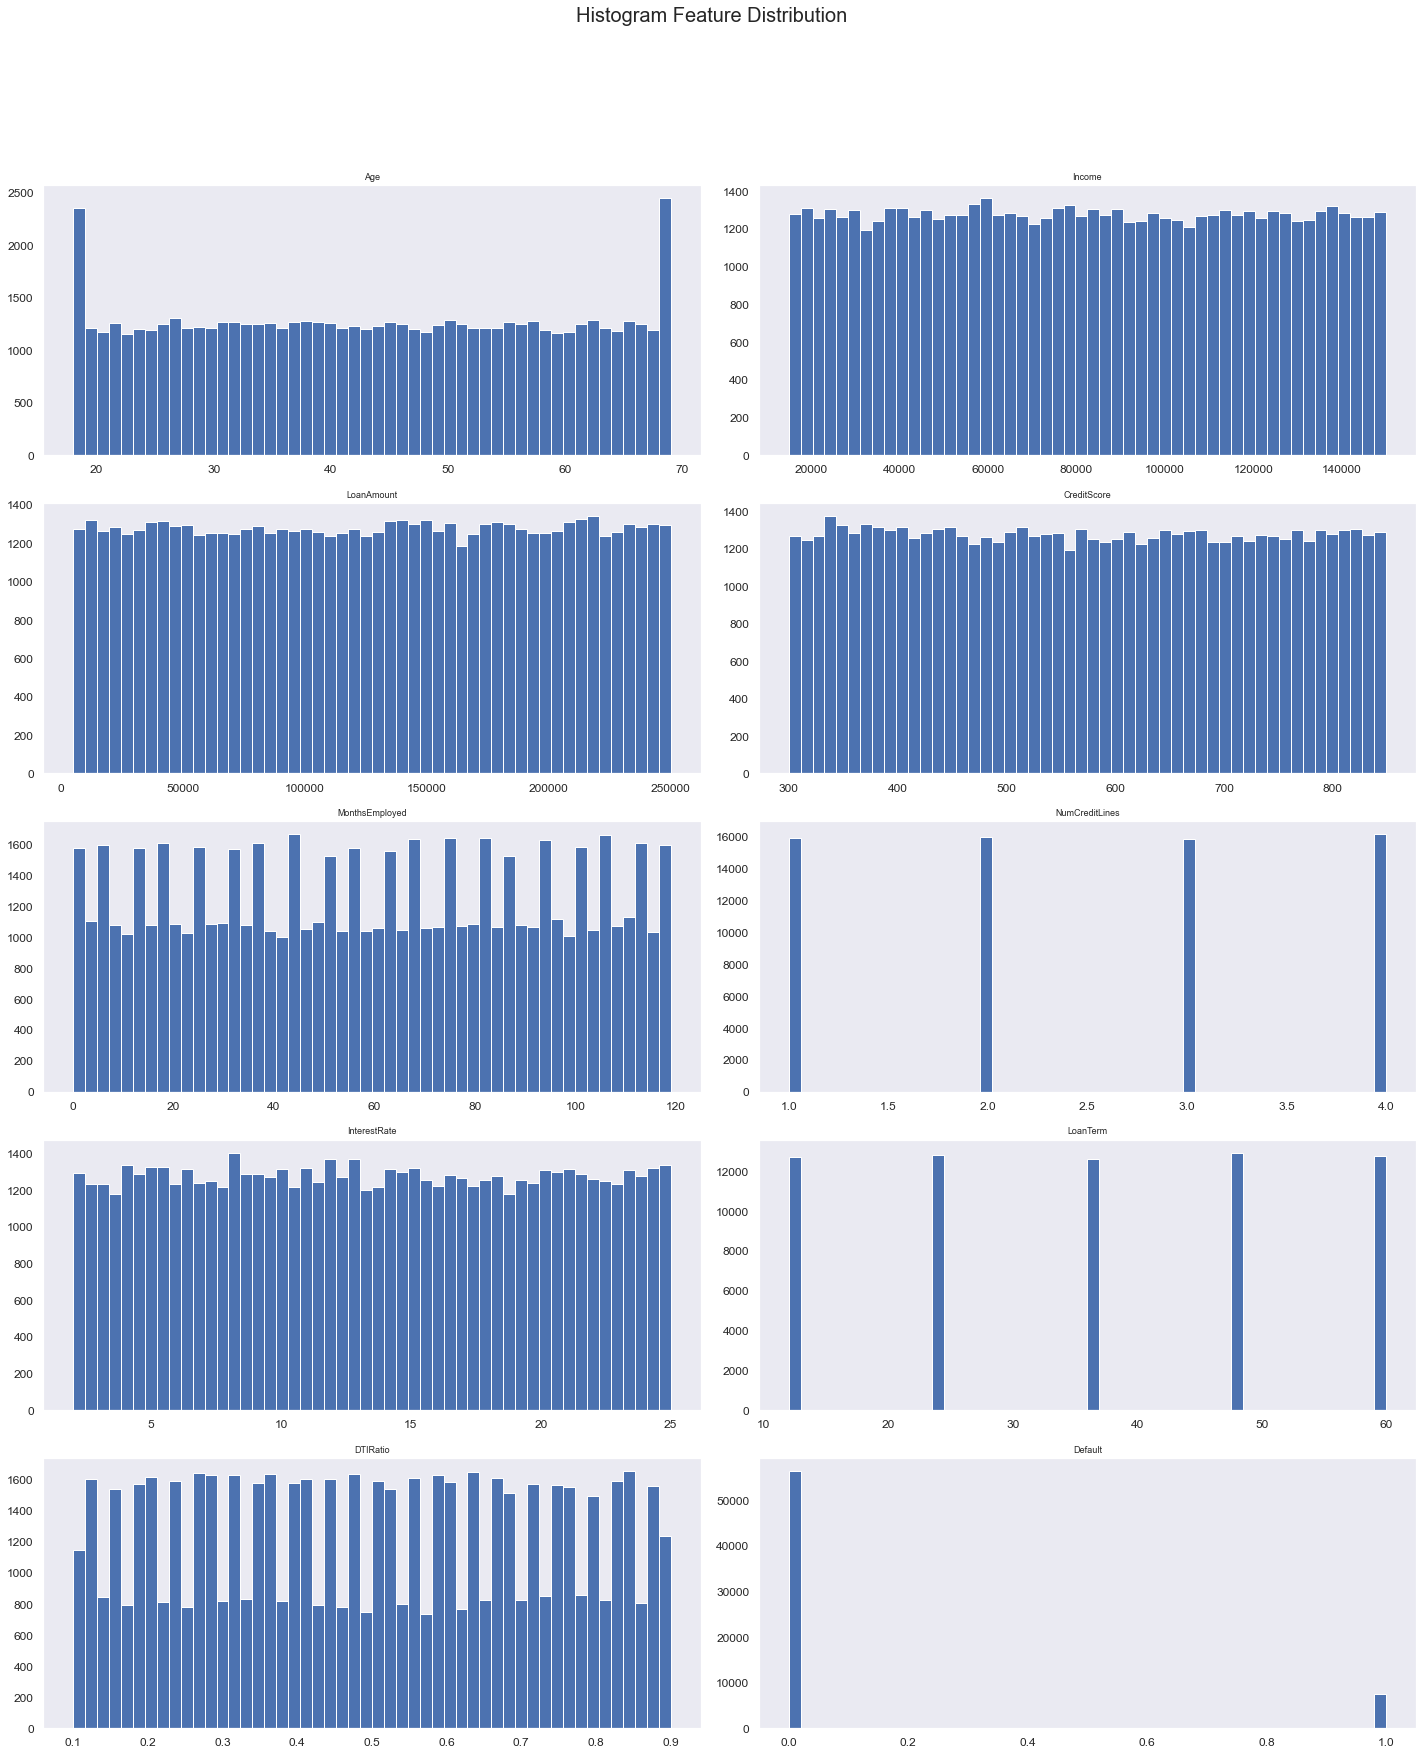

In [28]:
df.hist(bins=50, figsize=(20,80), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

### Seaborn Version

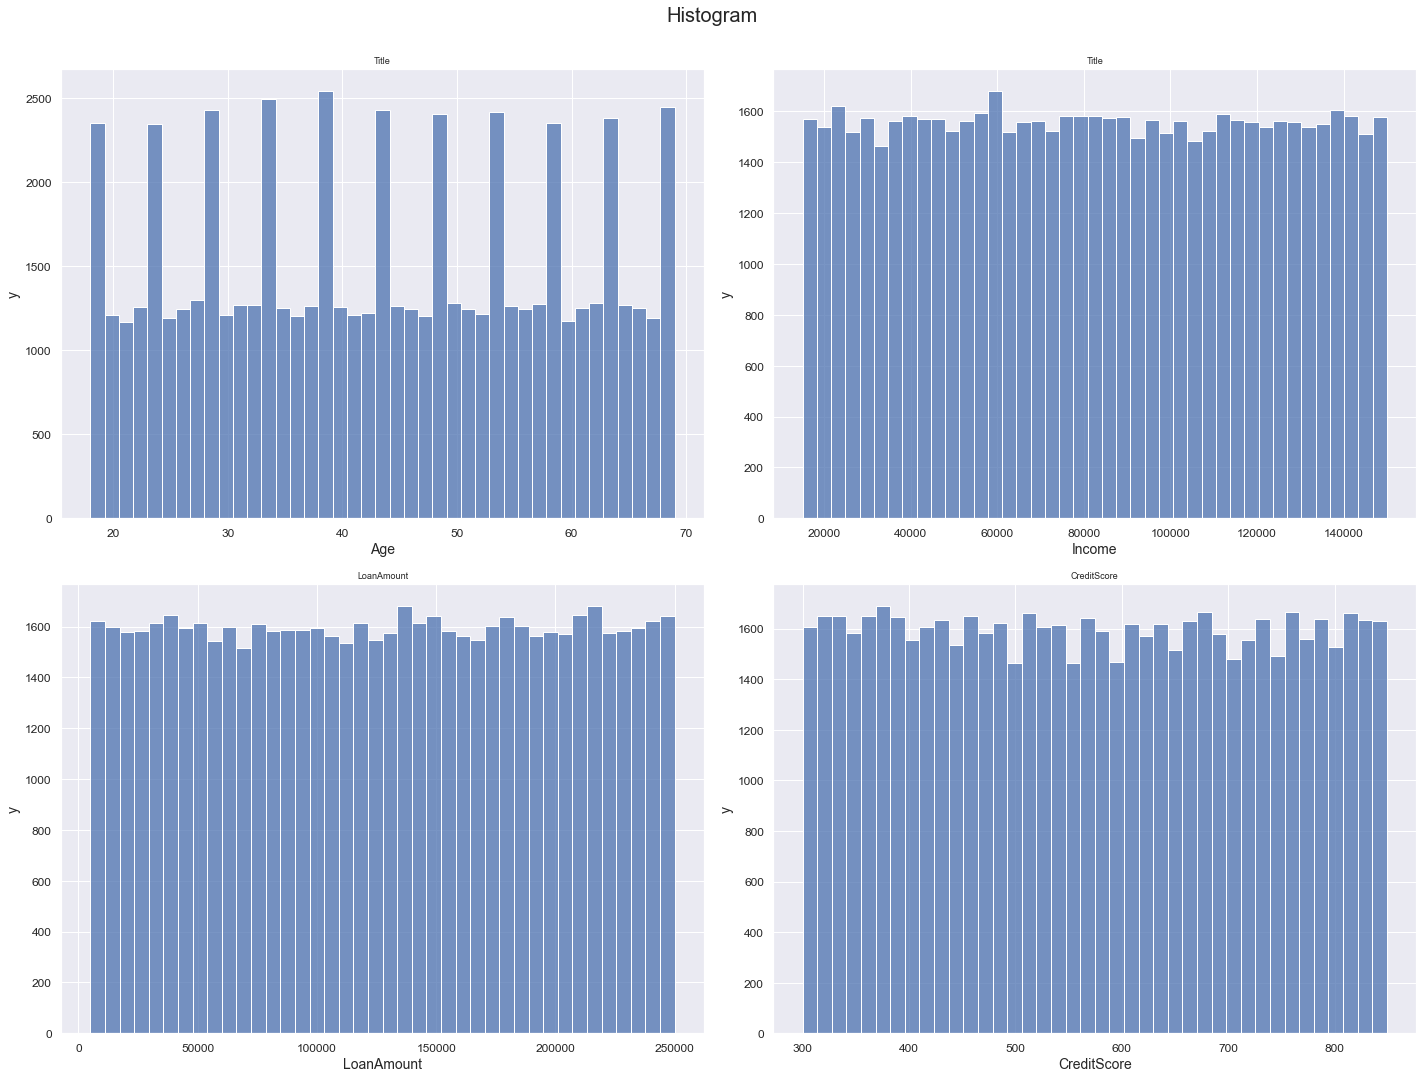

In [29]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Histogram', y=1.0, size = 20)

sns.histplot(data=df, x=df.Age, y=None, hue=None, ax=ax1)
ax1.set_title("Title")
ax1.set(xlabel="Age", ylabel="y")


sns.histplot(data=df, x=df.Income, y=None, hue=None, ax=ax2)
ax2.set_title("Title")
ax2.set(xlabel="Income", ylabel="y")

sns.histplot(data=df, x=df.LoanAmount, y=None, hue=None, ax=ax3)
ax3.set_title("LoanAmount")
ax3.set(xlabel="LoanAmount", ylabel="y")

sns.histplot(data=df, x=df.CreditScore, y=None, hue=None, ax=ax4)
ax4.set_title("CreditScore")
ax4.set(xlabel="CreditScore", ylabel="y")

plt.tight_layout()
plt.show()

**==========================================================================================================**

## Bar Plots

### Seaborn Version

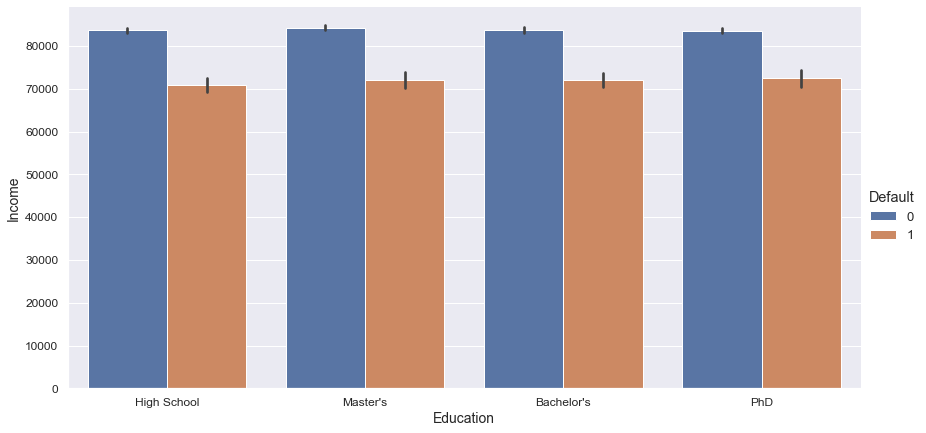

In [30]:
sns.catplot(x="Education", y="Income", kind='bar', data=df, hue ='Default', aspect=2, height=6)
plt.show()

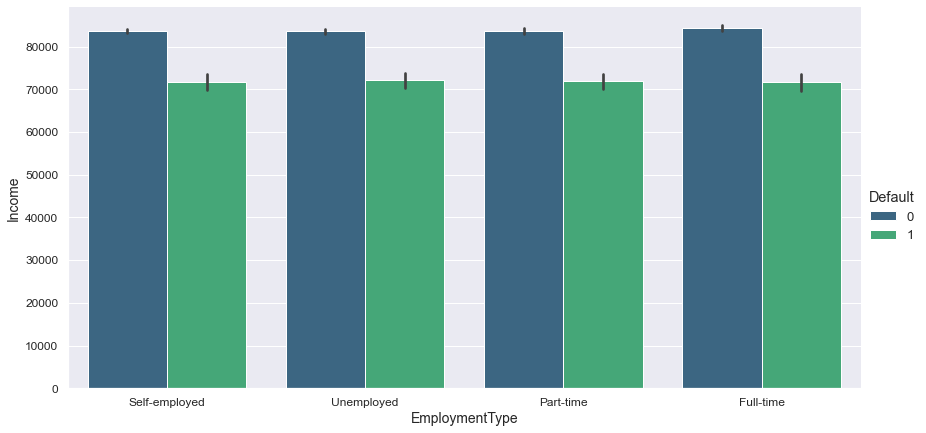

In [31]:
sns.catplot(x="EmploymentType", y="Income", kind='bar', data=df, hue ='Default', aspect=2, height=6, palette="viridis")
plt.show()

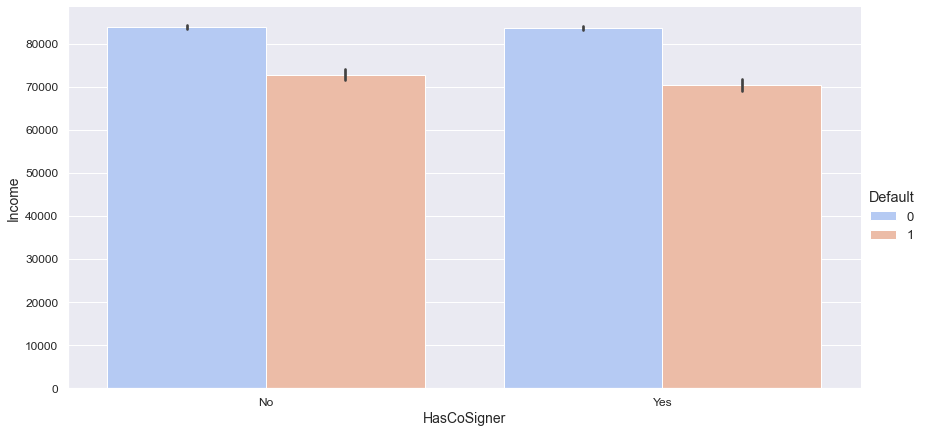

In [32]:
sns.catplot(x="HasCoSigner", y="Income", kind='bar', data=df, hue ='Default', aspect=2, height=6, palette="coolwarm")
plt.show()

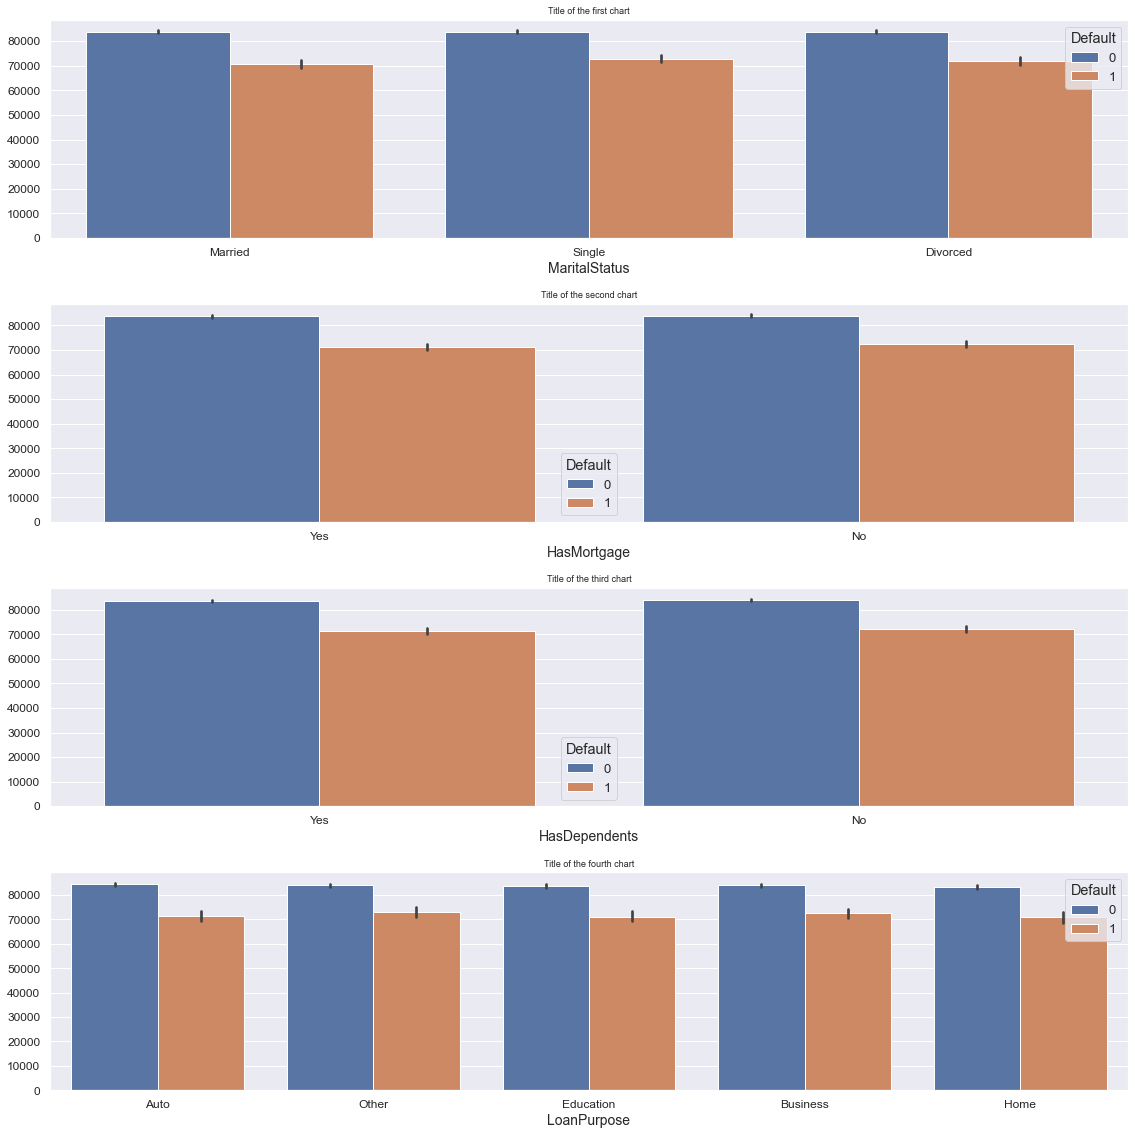

In [33]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title', y=1.0)


sns.barplot(x="MaritalStatus", y="Income", hue='Default', ci=95, data=df, orient=None, ax=ax[0])
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("MaritalStatus")
ax[0].set_ylabel("")

sns.barplot(x="HasMortgage", y="Income", hue='Default', ci=95, data=df, orient=None, ax=ax[1])
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("HasMortgage")
ax[1].set_ylabel("")

sns.barplot(x="HasDependents", y="Income", hue='Default', ci=95, data=df, orient=None, ax=ax[2])
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("HasDependents")
ax[2].set_ylabel("")

sns.barplot(x="LoanPurpose", y="Income", hue='Default', ci=95, data=df, ax=ax[3])
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("LoanPurpose")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Horizontal/Vertical Stacked Column Bar Chart

In [34]:
pd.crosstab(df["Education"], df["Default"], margins=True)

Default,0,1,All
Education,,,
Bachelor's,14145,2007,16152
High School,13756,2082,15838
Master's,14176,1758,15934
PhD,14260,1653,15913
All,56337,7500,63837


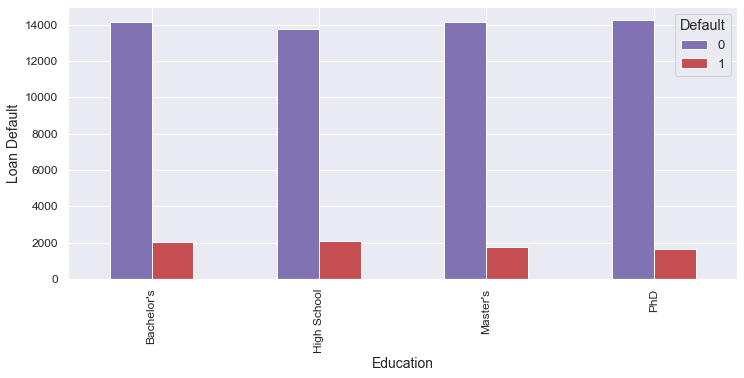

In [35]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["Education"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,5))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('Education')
plt.show()

In [36]:
pd.crosstab(df["EmploymentType"], df["Default"])

Default,0,1
EmploymentType,,
Full-time,14449,1506
Part-time,14084,2001
Self-employed,13974,1852
Unemployed,13830,2141


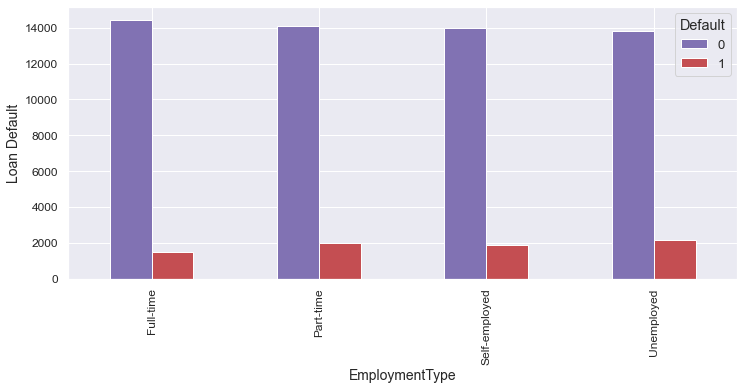

In [37]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["EmploymentType"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,5))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('EmploymentType')
plt.show()

In [38]:
pd.crosstab(df["MaritalStatus"], df["Default"])

Default,0,1
MaritalStatus,,
Divorced,18690,2659
Married,19093,2288
Single,18554,2553


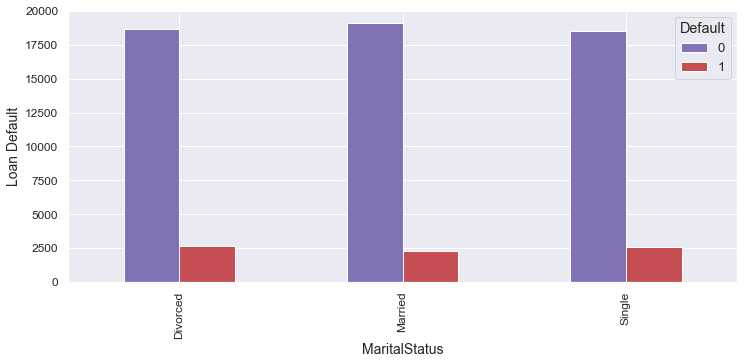

In [39]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["MaritalStatus"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,5))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('MaritalStatus')
plt.show()

In [40]:
pd.crosstab(df["HasMortgage"], df["Default"])

Default,0,1
HasMortgage,,
No,28081,4013
Yes,28256,3487


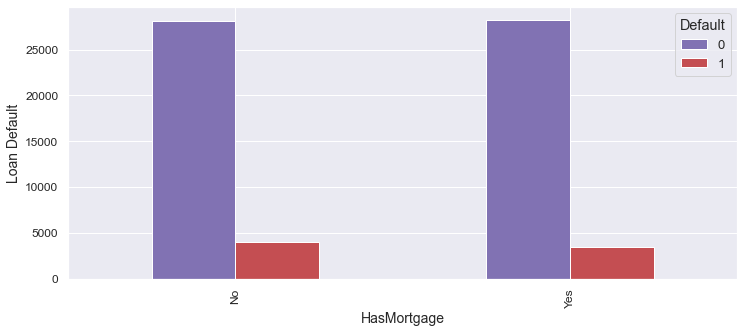

In [41]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["HasMortgage"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,5))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('HasMortgage')
plt.show()

In [42]:
pd.crosstab(df["HasDependents"], df["Default"])

Default,0,1
HasDependents,,
No,27696,4145
Yes,28641,3355


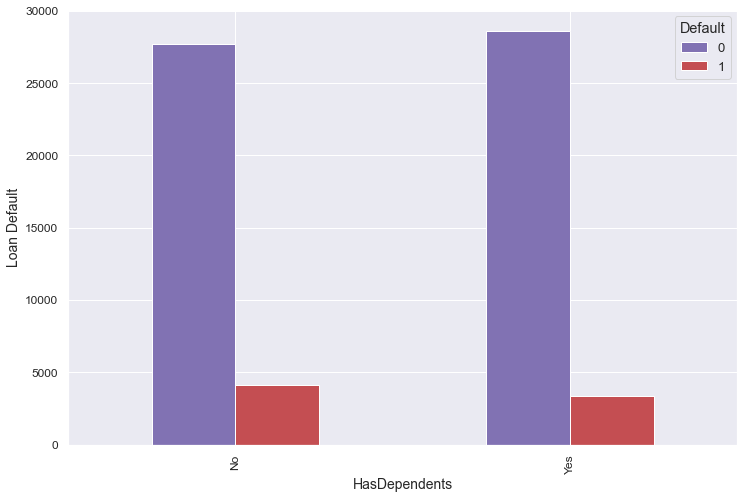

In [43]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["HasDependents"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,8))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('HasDependents')
plt.show()

In [44]:
pd.crosstab(df["LoanPurpose"], df["Default"])

Default,0,1
LoanPurpose,,
Auto,11298,1491
Business,11278,1597
Education,11128,1540
Home,11484,1347
Other,11149,1525


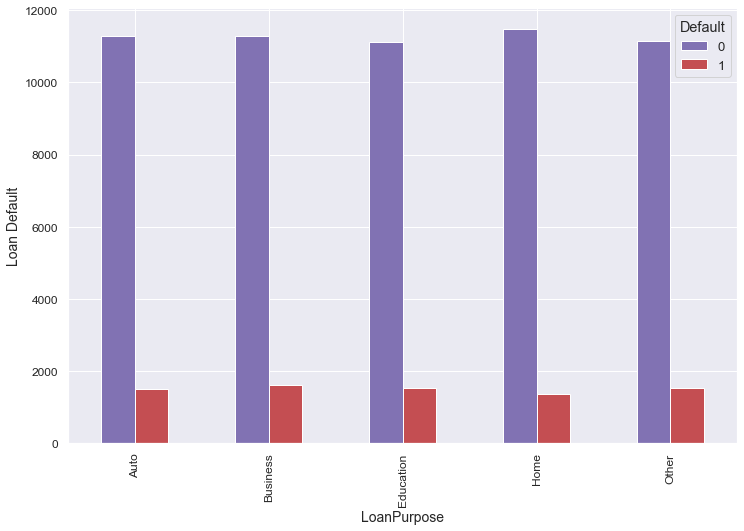

In [45]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["LoanPurpose"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,8))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('LoanPurpose')
plt.show()

In [46]:
pd.crosstab(df["HasCoSigner"], df["Default"])

Default,0,1
HasCoSigner,,
No,27801,4186
Yes,28536,3314


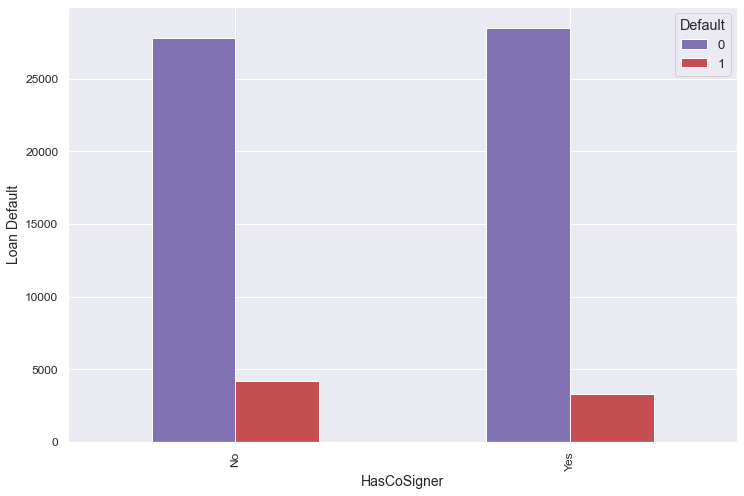

In [47]:
# Create a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["HasCoSigner"], df["Default"]).plot(kind ='bar', color='mr', figsize=(12,8))
#plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Loan Default')
plt.xlabel('HasCoSigner')
plt.show()

**==========================================================================================================**

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

### Pandas Version

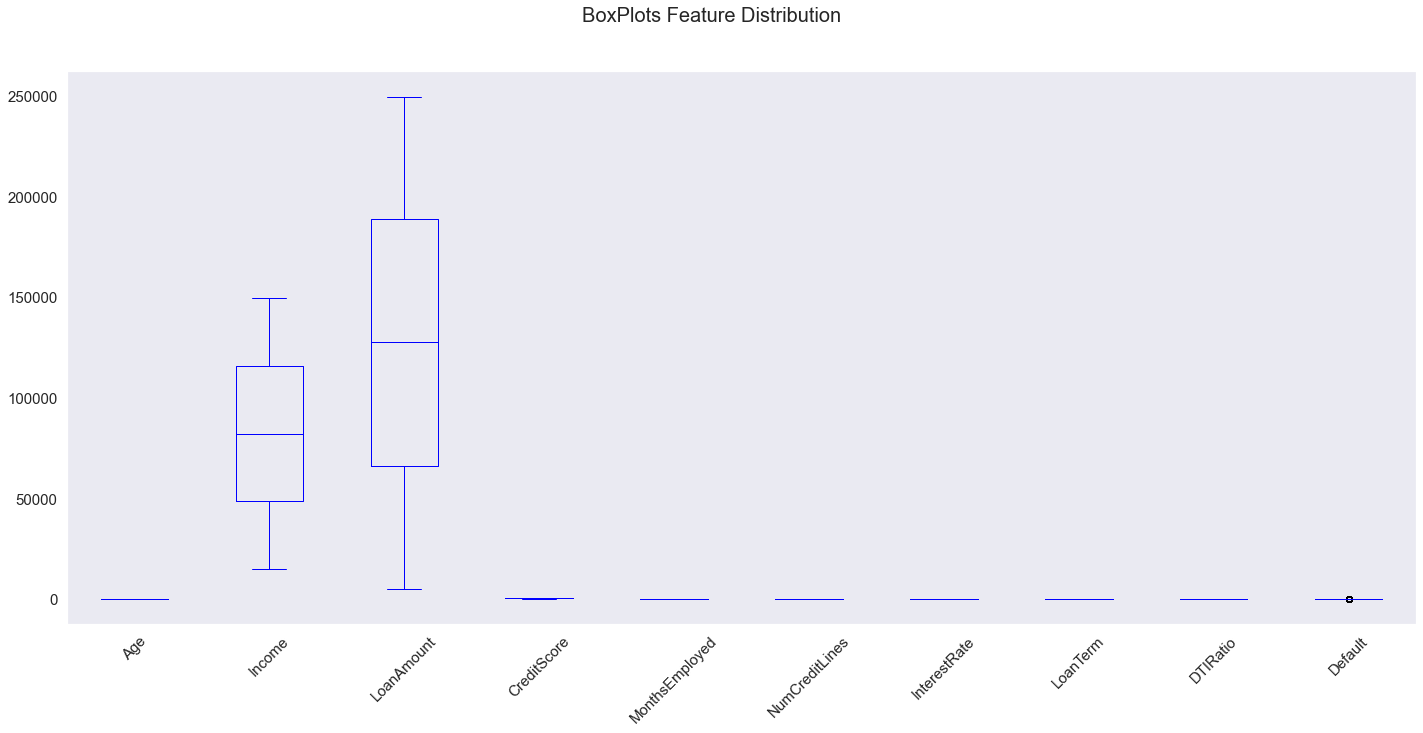

In [48]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15, grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

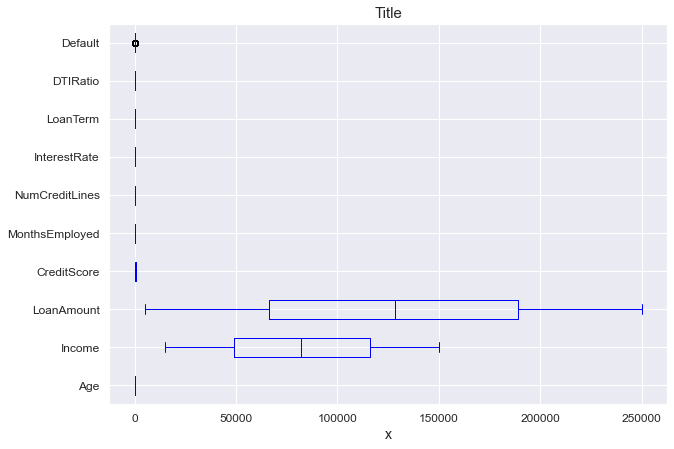

In [49]:
# horizontal box plots
df.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Title', size = 15)
plt.xlabel('x')

plt.show()

### Seaborn Version

In [50]:
list(df.select_dtypes(include='int64'))

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'LoanTerm',
 'Default']

In [51]:
list(df.select_dtypes(include='float64'))

['InterestRate', 'DTIRatio']

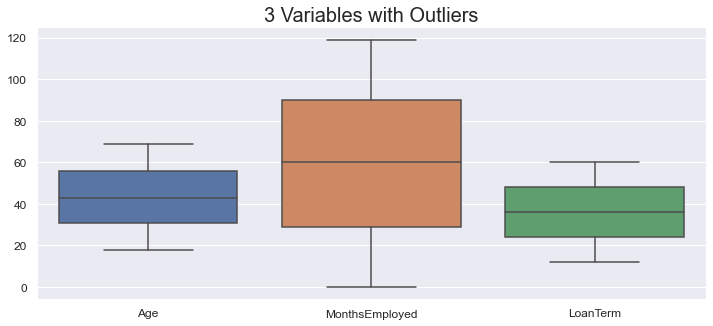

In [52]:
# Create boxplot to visualize the outliers
### YOUR CODE HERE ###

plt.figure(figsize=(12,5))
g = sns.boxplot(data=df[['Age', 'MonthsEmployed', 'LoanTerm']], showfliers=True);
g.set_title("3 Variables with Outliers", fontsize=20)
plt.show()

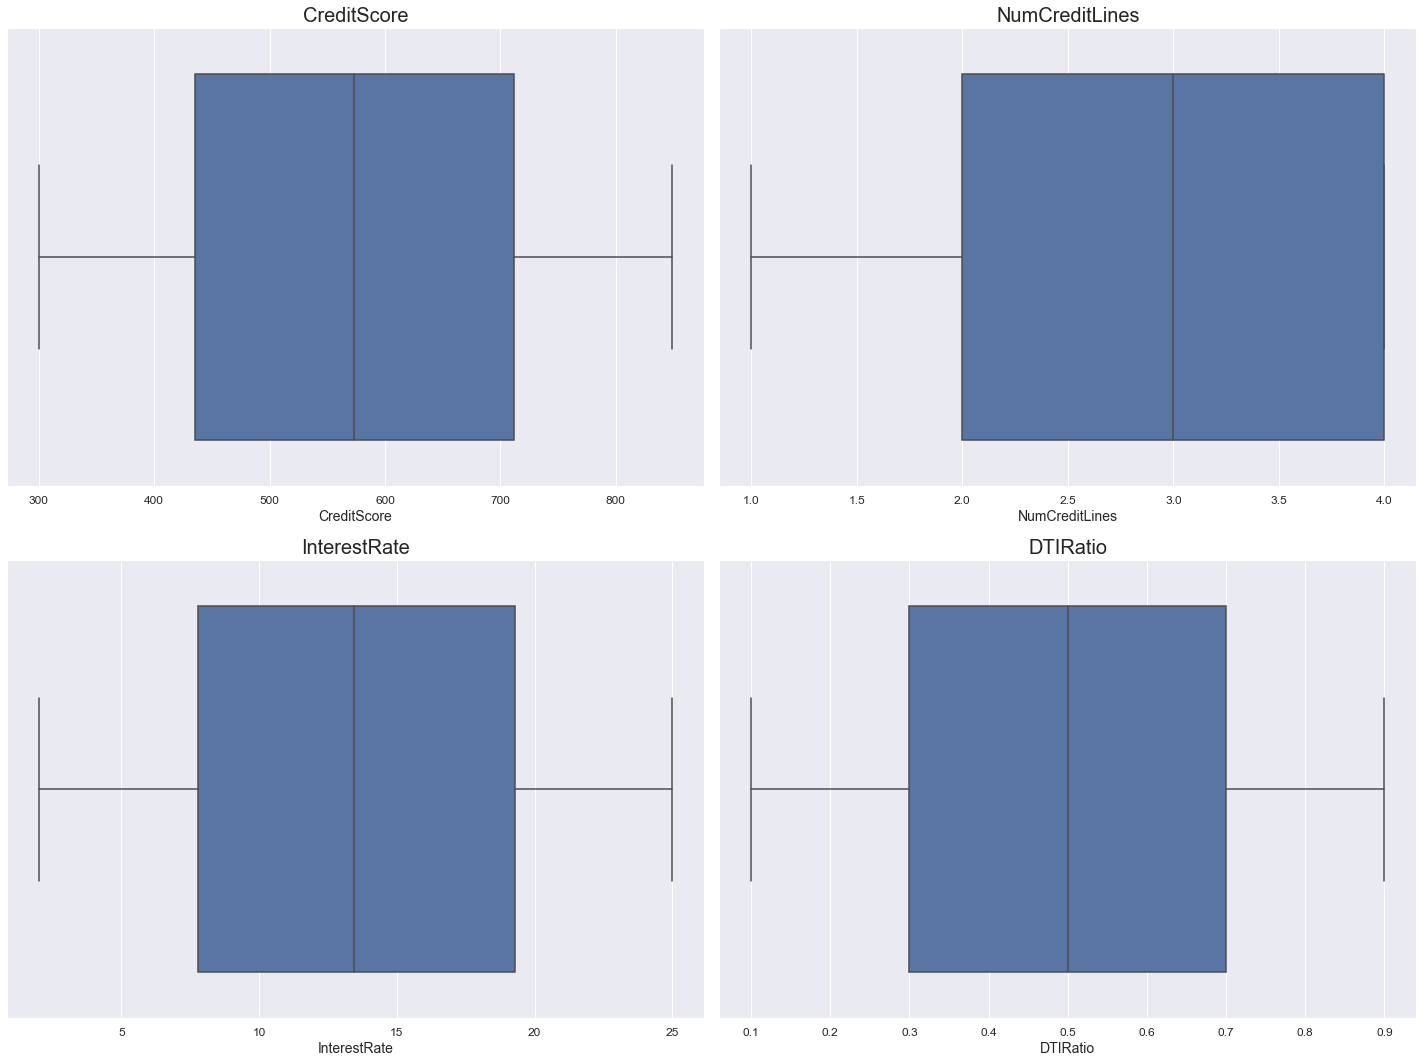

In [53]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,15))
#fig.suptitle('Main Title', y=1.0)

sns.boxplot(x='CreditScore', data=df, ax=ax1)
ax1.set_title('CreditScore', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("CreditScore")
ax1.set_ylabel("")

sns.boxplot(x="NumCreditLines", data=df, ax=ax2)
ax2.set_title('NumCreditLines', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("NumCreditLines")
ax2.set_ylabel("")

sns.boxplot(x="InterestRate", data=df, ax=ax3)
ax3.set_title('InterestRate', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("InterestRate")
ax3.set_ylabel("")

sns.boxplot(x="DTIRatio", data=df, ax=ax4)
ax4.set_title('DTIRatio', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("DTIRatio")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

**==========================================================================================================**

## Heatmap

### Seaborn Version

In [57]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,NRMNFOD1TI,56,109663,107028,498,9,3,18.48,12,0.45,High School,Self-employed,Married,Yes,Yes,Auto,No,0
1,QVAK8MJROX,56,129151,233093,610,48,3,10.03,36,0.51,Master's,Unemployed,Married,No,No,Other,No,0
2,GVAMCK6TF7,34,43087,162002,623,31,2,22.26,60,0.58,Bachelor's,Part-time,Married,Yes,Yes,Education,Yes,0
3,JLM099YEU9,40,63747,120320,590,14,3,4.73,60,0.13,PhD,Full-time,Married,No,No,Business,Yes,0
4,KAB93X18M3,48,124406,222023,784,106,3,9.82,24,0.42,High School,Full-time,Single,Yes,Yes,Business,Yes,0


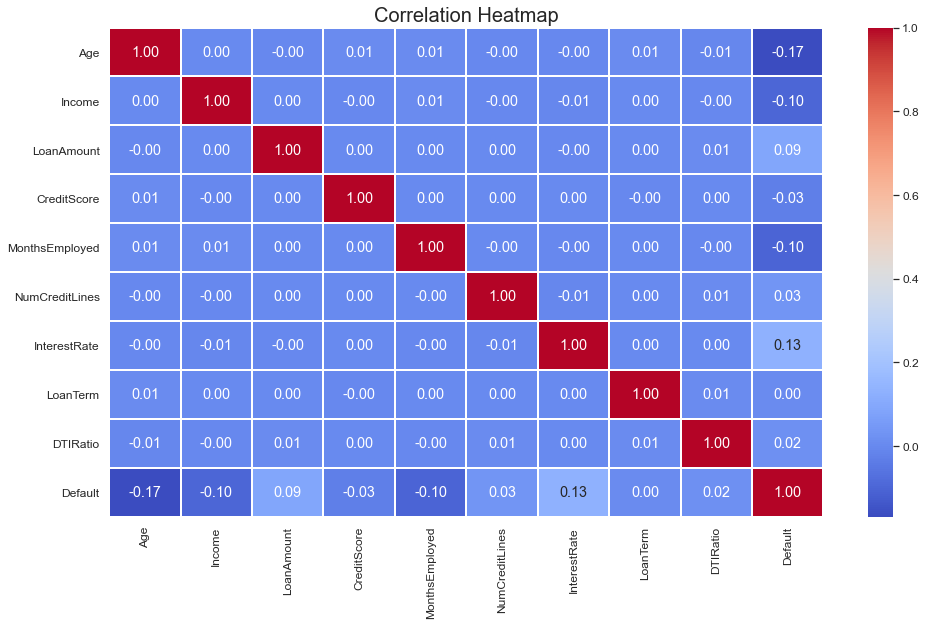

In [58]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==========================================================================================================**

## Pairplots

### Seaborn Version

In [59]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'], dtype='object')

In [60]:
# Take only continous variables

df_cont = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]

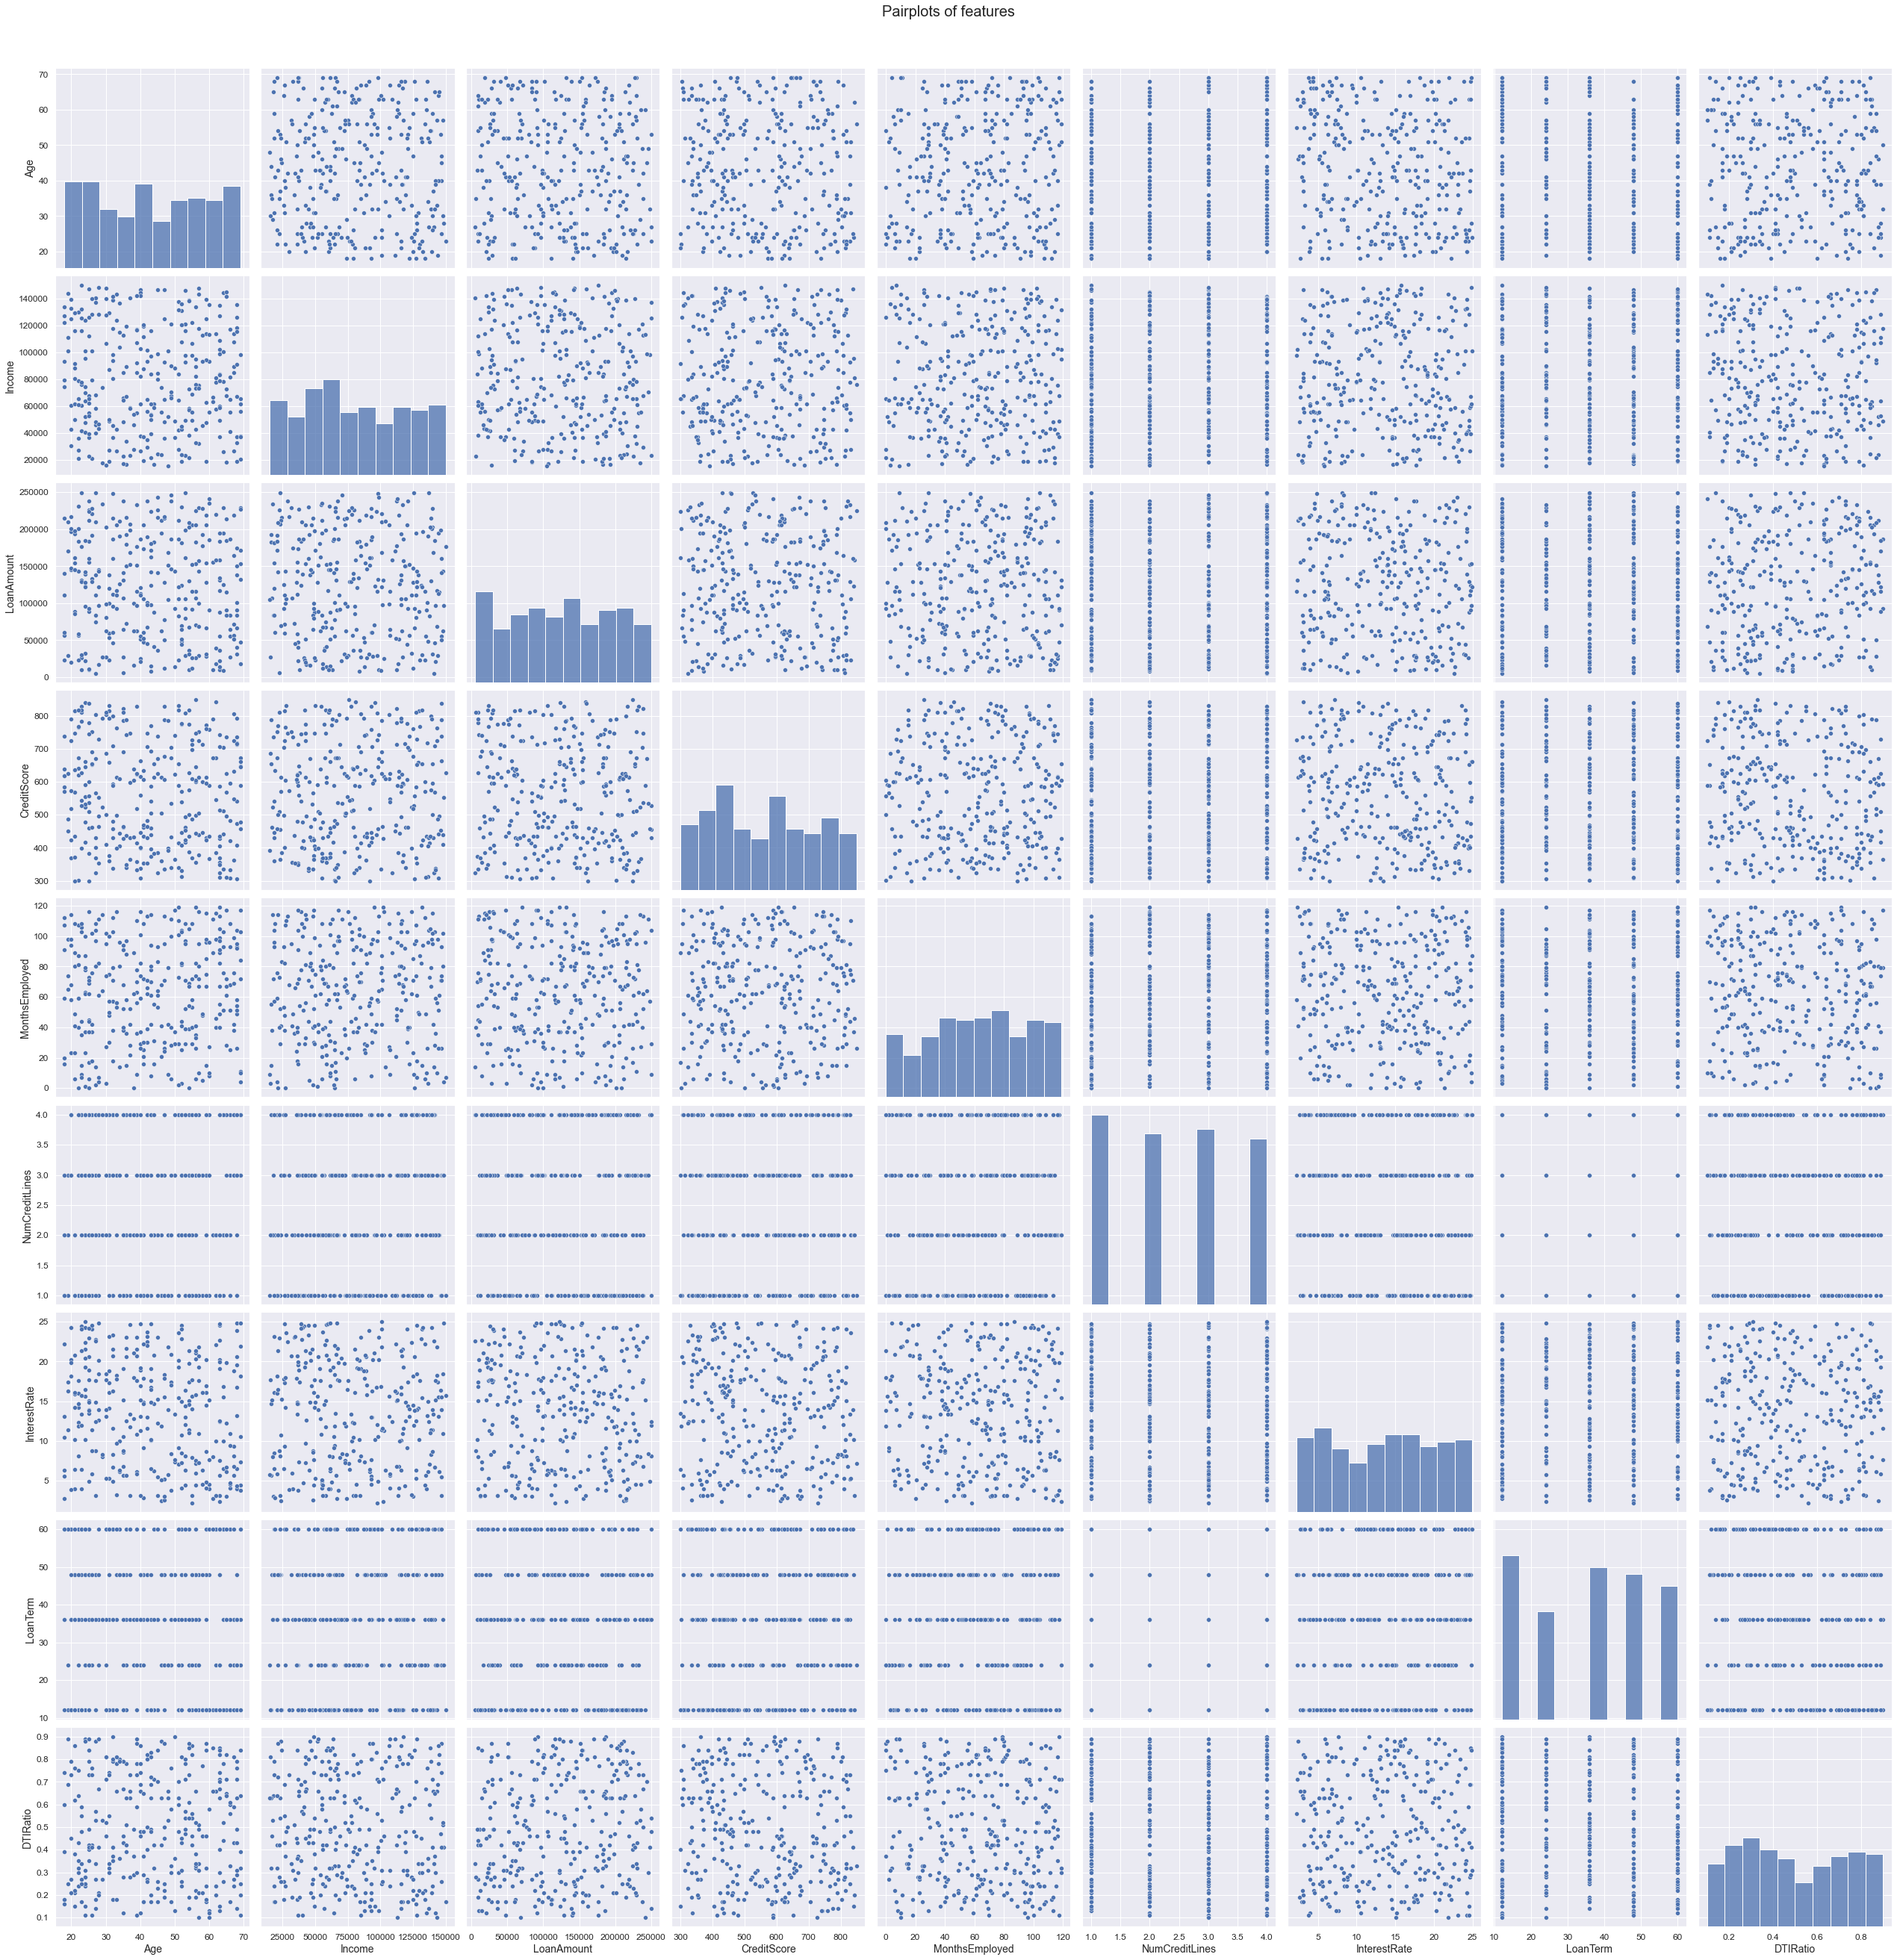

In [61]:
sns.pairplot(df_cont.sample(300), height=4, aspect=1)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

**==========================================================================================================**

#### Python code done by Dennis Lam